In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook

In [2]:
df= pd.read_excel('HIST_PAINEL_COVIDBR_24mai2020.xlsx', index_col=0) 


In [3]:
df= pd.read_excel('HIST_PAINEL_COVIDBR_24mai2020.xlsx') 

df_SP=df[df["estado"]=="SP"]
df_SP=df_SP[['estado','semanaEpi','populacaoTCU2019','casosAcumulado','obitosAcumulado']]
df_SP=(df_SP.fillna(0)
            .groupby(['semanaEpi']).max())
df_SP["Mortalidade(%)"]=df_SP["obitosAcumulado"]/df_SP['casosAcumulado']*100

df_SP

,estado,populacaoTCU2019,casosAcumulado,obitosAcumulado,Mortalidade(%)
semanaEpi,,,,,
9,SP,45919049.0,2,0,0.000000
10,SP,45919049.0,13,0,0.000000
11,SP,45919049.0,65,0,0.000000
12,SP,45919049.0,459,15,3.267974
13,SP,45919049.0,1406,84,5.974395
14,SP,45919049.0,4466,260,5.821764
15,SP,45919049.0,8419,560,6.651621
16,SP,45919049.0,13894,991,7.132575
17,SP,45919049.0,20004,1667,8.333333


In [4]:

df_PE=df[df["estado"]=="PE"]
df_PE['municipio'].unique()
df_PE.columns.tolist()
df_PE=df_PE[['estado','semanaEpi','populacaoTCU2019','casosAcumulado','obitosAcumulado','Recuperadosnovos']]
df_PE=df_PE.groupby(['semanaEpi']).max()
df_PE["Mortalidade(%)"]=df_PE["obitosAcumulado"]/df_PE['casosAcumulado']*100


          
df_PE

,estado,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,Mortalidade(%)
semanaEpi,,,,,,
11,PE,9557071.0,2,0,NaN,0.000000
12,PE,9557071.0,30,0,NaN,0.000000
13,PE,9557071.0,68,5,NaN,7.352941
14,PE,9557071.0,176,14,NaN,7.954545
15,PE,9557071.0,816,72,NaN,8.823529
16,PE,9557071.0,2193,205,NaN,9.347925
17,PE,9557071.0,4507,381,NaN,8.453517
18,PE,9557071.0,8145,628,NaN,7.710252
19,PE,9557071.0,12470,972,NaN,7.794707


<IPython.core.display.Javascript object>


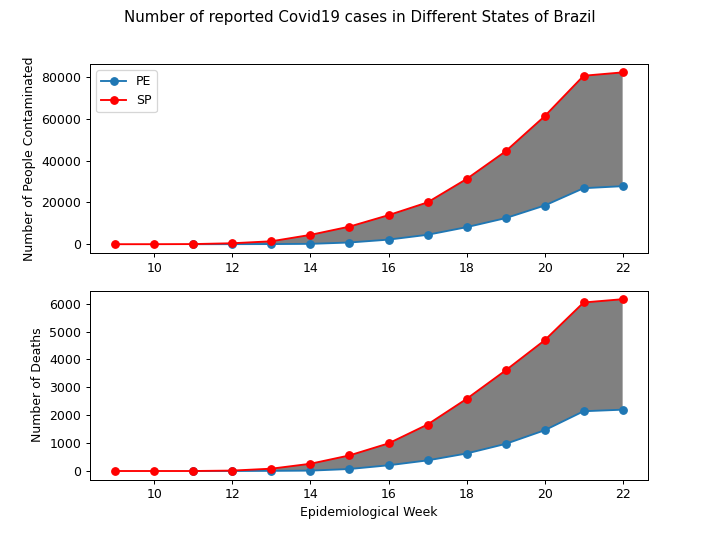

In [5]:
#Plot de Casos Acumulados
fig = plt.figure(num=None,figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

casos_PE=df_PE['casosAcumulado']

fig.suptitle('Number of reported Covid19 cases in Different States of Brazil')

ax1_PE=ax1.plot(casos_PE,'-o',label='PE')
ax1_SP=ax1.plot(df_SP['casosAcumulado'],'-ro',label="SP")
casos_SP=df_SP['casosAcumulado'][df_SP.index>10]
ax1.legend()
ax1.fill_between(df_PE.index.tolist(),casos_PE,casos_SP,where=casos_SP>casos_PE,facecolor='gray', interpolate=True)

ax1.set_ylabel('Number of People Contaminated')



ob_PE=df_PE['obitosAcumulado']
ax2_PE=ax2.plot(ob_PE,'-o',label='PE')
ax2_SP=ax2.plot(df_SP['obitosAcumulado'],'-ro',label="SP")
ob_SP=df_SP['obitosAcumulado'][df_SP.index>10]
ax1.legend()
ax2.fill_between(df_PE.index.tolist(),ob_PE,ob_SP,where=ob_SP>ob_PE,facecolor='gray', interpolate=True)
ax2.set_xlabel('Epidemiological Week')
ax2.set_ylabel('Number of Deaths')
plt.show()

<IPython.core.display.Javascript object>


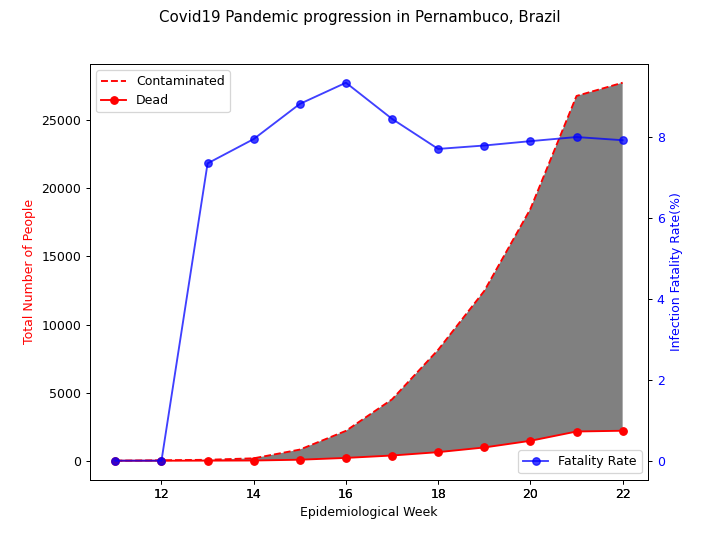

In [7]:
fig = plt.figure(num=None,figsize=(8,6))
ax1 = fig.add_subplot(111)

fig.suptitle('Covid19 Pandemic progression in Pernambuco, Brazil')

casos_PE=df_PE['casosAcumulado']

ax1_PE=ax1.plot(casos_PE,'--r',label='Contaminated')
ax1_SP=ax1.plot(ob_PE,'-ro',label="Dead")
ax1.set_xlabel('Epidemiological Week')
ax1.set_ylabel('Total Number of People',color='r')
#ax1.yticks(color="r",alpha=1)
ax1.legend()


ax2 =fig.add_subplot(111,sharex=ax1,frameon=False)
ax2.plot(df_PE['Mortalidade(%)'], '-bo',label="Fatality Rate", alpha = 0.75)
ax2.legend(loc=4)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Infection Fatality Rate(%)',color='b')
plt.yticks(color = 'b', alpha = 1)
ax1.fill_between(df_PE.index.tolist(),casos_PE,ob_PE,where=casos_PE>ob_PE,facecolor='gray', interpolate=True)
